In [42]:
import pandas as pd
import pickle as p
import numpy as np
import operator

from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.corpus import stopwords

### Remove non english chars and special chars

In [43]:
stop_words = set(stopwords.words('english')).union(STOP_WORDS)
custom_stopwords = set(['wikipedia', 'article', 'page', 'talk', 'like', 'know', 'edit', 'use', 
                        'think', 'wiki', 'people', 'b', 'hi', 'hey', ])
stop_words = stop_words.union(custom_stopwords)

In [44]:
train_data = pd.read_csv('../dataset/train.csv').dropna().astype(str)
test_data = pd.read_csv('../dataset/test.csv').fillna('').astype(str)

In [46]:
import re

remove = re.compile('[^a-zA-Z ]')

def filter_non_english_chars(documents):
    return pd.Series(list(map(lambda doc: remove.sub(string=doc.lower(), repl=''), documents)))

In [47]:
clean_train = filter_non_english_chars(train_data.comment_text)
clean_test = filter_non_english_chars(test_data.comment_text)

In [48]:
def remove_stop_words(texts):
    return list(map(lambda text: ' '.join(map(lambda word: word, text)), 
                map(lambda words: list(filter(lambda word: word not in stop_words, words)), texts.str.split())))

In [49]:
clean_train = remove_stop_words(clean_train)
clean_test = remove_stop_words(clean_test)

In [50]:
train_data.comment_text = clean_train
test_data.comment_text = clean_test

In [51]:
train_data.to_csv('../dataset/preprocessed_train.csv', index=False)
test_data.to_csv('../dataset/preprocessed_test.csv', index=False)

## Length Distribution

In [23]:
clean_lengths = train_data.comment_text.str.split().str.len()

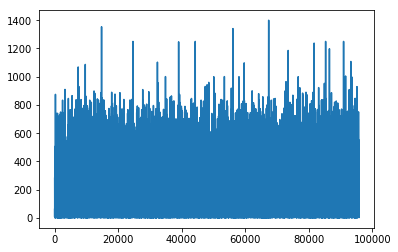

In [24]:
clean_lengths.plot()

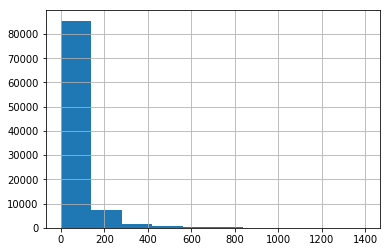

In [25]:
clean_lengths.hist()

In [26]:
clean_lengths.describe()

count    95851.000000
mean        65.002483
std         96.919906
min          0.000000
25%         16.000000
50%         34.000000
75%         73.000000
max       1400.000000
Name: comment_text, dtype: float64

In [27]:
clean_lengths_value_counts = clean_lengths.value_counts()

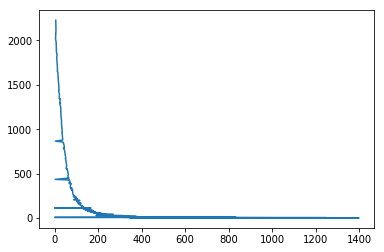

In [29]:
clean_lengths_value_counts.plot()

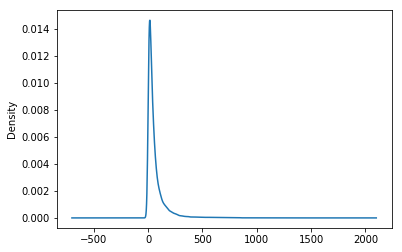

In [32]:
clean_lengths.plot.density()

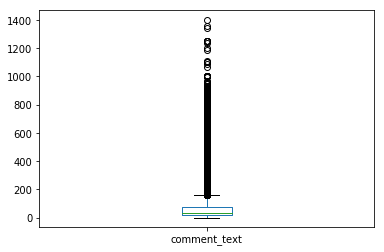

In [34]:
clean_lengths.plot.box()

## Word Distributions

In [9]:
cv = CountVectorizer(stop_words=stop_words)

In [11]:
words = cv.fit_transform(clean_train)

In [12]:
names = cv.get_feature_names()

In [13]:
def get_word_count_dict(term_document_matrix, feature_names):
    """
    """
    counts = np.sum(term_document_matrix, axis=0).A1
    
    return {name: count for name, count in zip(feature_names, counts)}

In [14]:
def get_sorted_word_counts(count_dict):
    return sorted(count_dict.items(), key=operator.itemgetter(1), reverse=True)


In [18]:
count_dict = get_word_count_dict(words, names)
sorted_d = get_sorted_word_counts(count_dict)

In [19]:
%matplotlib inline
counts = pd.DataFrame({'counts': list(map(lambda x: x[1], sorted_d))}, index=list(map(lambda x: x[0], sorted_d)))

In [ ]:
len(counts)

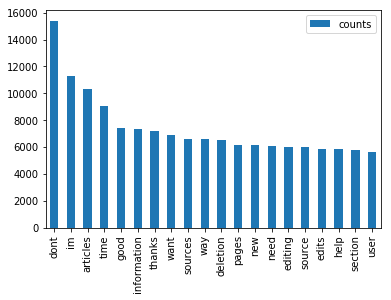

In [21]:
counts[:20].plot(kind='bar')

In [ ]:
`def clean_output_data(data, name):
    labels = pd.concat([data.toxic, data.severe_toxic, data.obscene, 
           data.threat, data.insult, data.identity_hate], axis=1)
    
    data = train_data[labels.sum(axis=1) > 0].reset_index(drop=True)
    
    
    data.to_csv('data/{}.csv'.format(name), index=False)

In [ ]:
clean_output_data(test_data, 'preprocessed_test')